
# LOAN PREDICTION DATA SCIENCE PROBLEM

*Luquiens, Guillaume*

Paris, FRANCE



# 1. Problem description

About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Practice Skills

Binary classification Python and R basics

# 2. Dataset Loaded

The dataset is available in the Analytics Vidhya competitions, with a train and test files Loan Prediction : [Loan Prediction datathon](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

# 3. Manage data

A lot of transformations are to be done to get the best classifier results.
3.1 Import Libraries

The following code is written in Python 3. A lot of librairies are available with many intersting functions.
Data frame and arrays libraries


## 3.1. Import Librairies

**Arrays and data frame librairies**

In [1]:
import pandas as pd
import numpy as np

**Algorithms and models**

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

**Visualization librairies**

In [3]:
#pip install kaggle

In [4]:
#kaggle kernels output ajaymanwani/loan-approval-prediction -p /path/to/dest

In [5]:
# librairies
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# plot description
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 8

## 3.2. Load data

In [6]:
#import data from file: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
df = pd.read_csv('df1_loan.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
#data_test  = pd.read_csv('data/test.csv')

The train and test datasets are now downloaded. We can have a look at the first rows, with the columns header. It will give us an example of the available datas

In [7]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


On the elements available on those first loan_ID parameters, we see that coloumns have a different type of object. The info() function will describe those different elements

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


# 4. Preprocessing

The number of entries should be 500 on each column. But some column have less. Let's calculate the number of empty entries according to the column.

In [9]:
df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

## 4.1 Nan or useless columns

So, we can see two elements :
- first of all, the two first columns doesnt seem very usefull. The look life an index.
- a statistic imputation is going to be needed to fill those Nan elements to the rest of the column. 
A visualization of the features to understand this dataset is usefull to fill with the right imputation way. 

In [10]:
df=df.drop(['Unnamed: 0', 'Loan_ID'], axis=1)
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,491,497,488,500,473,500.000000,500.000000,482.000000,486.000000,459.000000,500,500,500
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,457
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,$6000.0
freq,400,322,288,393,407,NaN,NaN,NaN,NaN,NaN,188,345,4
mean,NaN,NaN,NaN,NaN,NaN,5493.644000,1506.307840,144.020747,342.543210,0.843137,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6515.668972,2134.432188,82.344919,63.834977,0.364068,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2874.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3854.000000,1125.500000,126.500000,360.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5764.000000,2253.250000,161.500000,360.000000,1.000000,NaN,NaN,NaN


- **many Nan objects, but just a few of them**

Anyway, ye can try to see the link between some of those missing vaue in of train data

Dependents           12
Self_Employed        27
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41

Pas curiostité, comparaison des *Credit-History*, assez présentes.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

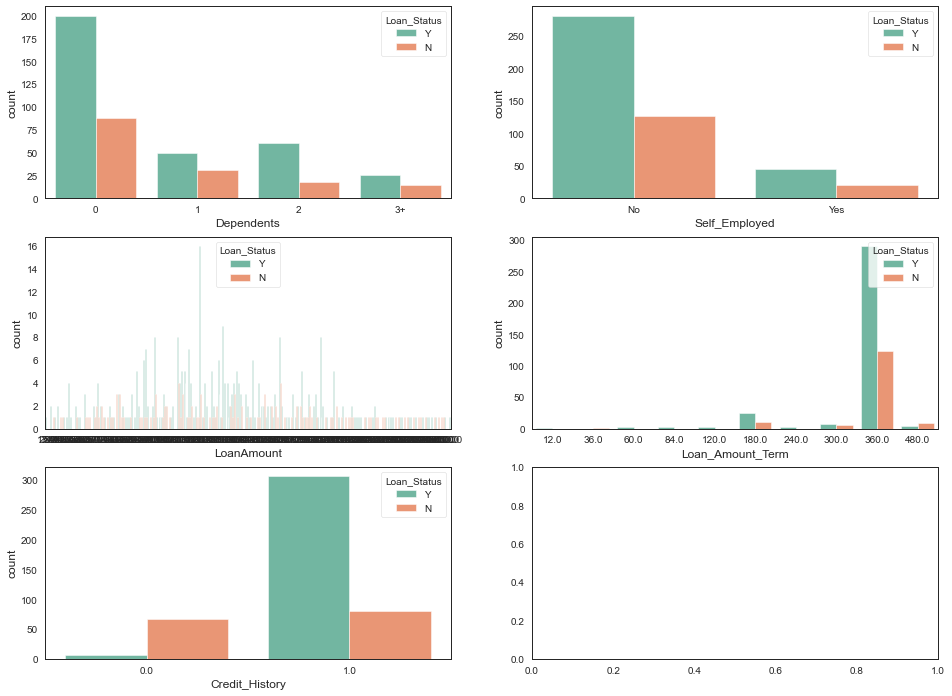

In [11]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))
sns.countplot(x='Dependents', data=df, hue='Loan_Status', ax=ax1)
sns.countplot(x='Self_Employed', data=df, hue='Loan_Status', ax=ax2)
sns.countplot(x='LoanAmount', data=df, hue='Loan_Status', ax=ax3)
sns.countplot(x='Loan_Amount_Term', data=df, hue='Loan_Status', ax=ax4)
sns.countplot(x='Credit_History', data=df, hue='Loan_Status', ax=ax5)

- **Fill the empty entries**

In [12]:
median_features = df.get(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
median_features.describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,482.000000,486.000000,459.000000
mean,144.020747,342.543210,0.843137
std,82.344919,63.834977,0.364068
min,17.000000,12.000000,0.000000
25%,100.000000,360.000000,1.000000
50%,126.500000,360.000000,1.000000
75%,161.500000,360.000000,1.000000
max,700.000000,480.000000,1.000000


In [13]:
median_features = median_features.dropna().median()
median_features

LoanAmount          127.5
Loan_Amount_Term    360.0
Credit_History        1.0
dtype: float64

In [14]:
data_encoded=df.fillna(median_features)

## 4.2. Categorical to numerical

- **Total Income**

That's what we see for the Total Income. It should be a numerical value, and not an object with the $

In [15]:
df['Total_Income']=df['Total_Income'].replace('[\$,]', '', regex=True).astype(float)

- **Many variable categorical variable that can be**

Convert categorical variable into dummy/indicator variables

In [16]:
#let's convert the df. With the sklearn tools, we need to have every row in numerical values.
data_encoded = pd.concat(
    [df.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History', 'Total_Income']),
             pd.get_dummies(df.Gender, prefix='Gender', drop_first=True),
             pd.get_dummies(df.Married, prefix='Married', drop_first=True),
             pd.get_dummies(df.Dependents, prefix='Dependents', drop_first=True),
             pd.get_dummies(df.Education, prefix='Education', drop_first=True),
             pd.get_dummies(df.Self_Employed, prefix='Self_Employed', drop_first=True),
             pd.get_dummies(df.Property_Area, prefix='Property_Area', drop_first=True),
             pd.get_dummies(df.Loan_Status, prefix='Loan_Status', drop_first=True)],
    axis=1)

# how the concatenate function worked ??
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1


In [17]:
median_features = data_encoded.get(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
median_features.describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,482.000000,486.000000,459.000000
mean,144.020747,342.543210,0.843137
std,82.344919,63.834977,0.364068
min,17.000000,12.000000,0.000000
25%,100.000000,360.000000,1.000000
50%,126.500000,360.000000,1.000000
75%,161.500000,360.000000,1.000000
max,700.000000,480.000000,1.000000


In [18]:
median_features = median_features.dropna().median()
median_features

LoanAmount          127.5
Loan_Amount_Term    360.0
Credit_History        1.0
dtype: float64

In [19]:
data_encoded=data_encoded.fillna(median_features)

In [20]:
data_encoded.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Total_Income               0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

# 4. Visualization

In [21]:
data_encoded.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,127.5,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0


## 4.1. Loan Status to be predicted

We have a supervised prediction to do with the Loan Status : it is Yes (Y) or No (N).

In [22]:
print('Values to predict : ',data_encoded['Loan_Status_Y'].unique())

Values to predict :  [1 0]


Compare the frequence of Loan_Status values

<AxesSubplot:xlabel='Loan_Status_Y', ylabel='count'>

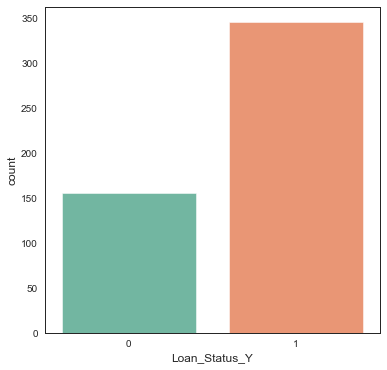

In [23]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1)) = plt.subplots(1, 1, figsize=(6,6))
sns.countplot(x='Loan_Status_Y', data=data_encoded, ax=ax1)

We see that the Yes (Y) Status is twice bigger thant the No (N) one.

## 4.2. Features

### Continuous features

Intersting to check the distribution of the continuous features.

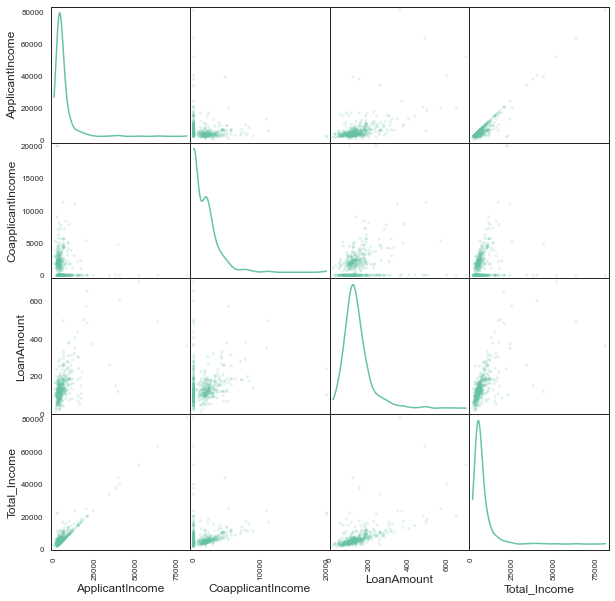

In [24]:
scatter_matrix(df.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']), alpha=0.2,
               figsize=(10, 10), diagonal='kde');

The ApplicantIncome and CoappliantIconme have a distribution very close to there min. Let's focus on those two columns

In [25]:
print('ApplicantIncome summary:\n', df['ApplicantIncome'].describe())
print('-'*20)
print('CoapplicantIncome summary:\n', df['CoapplicantIncome'].describe())

ApplicantIncome summary:
 count      500.000000
mean      5493.644000
std       6515.668972
min        150.000000
25%       2874.500000
50%       3854.000000
75%       5764.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
--------------------
CoapplicantIncome summary:
 count      500.000000
mean      1506.307840
std       2134.432188
min          0.000000
25%          0.000000
50%       1125.500000
75%       2253.250000
max      20000.000000
Name: CoapplicantIncome, dtype: float64


So, for those two columns, the mean is very higher thant it's median (50%).

**We can see how to optimize those values**

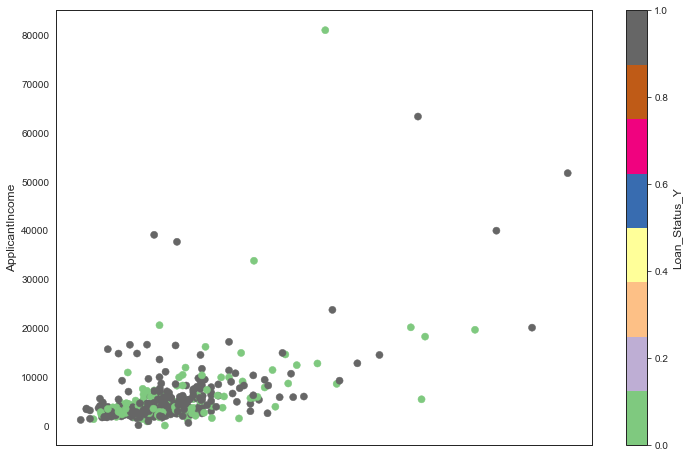

In [26]:
data_encoded.plot(kind='scatter', y='ApplicantIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

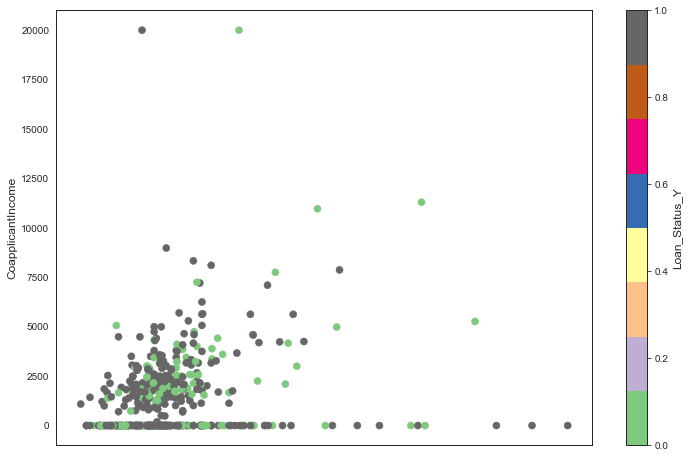

In [27]:
data_encoded.plot(kind='scatter', y='CoapplicantIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

Maybe, a log function will optimize those two parameters

In [28]:
# we can't use the log function for a 0 value. So, because the min CoapplicantIncome is 0, we add 10 to the Coaaplicant Income vlaue
data_train_log = data_encoded.assign(LogIncome=lambda x: np.log(x.ApplicantIncome + 10.))
data_train_log = data_train_log.drop('ApplicantIncome', axis = 1)

In [29]:
data_train_log.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome
0,0.0,127.5,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1,8.675734
1,1508.0,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0,8.432289
2,0.0,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1,8.009695
3,2358.0,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1,7.860571
4,0.0,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1,8.701180


In [30]:
np.log(10)

2.302585092994046

In [31]:
# we can't use the log function for a 0 value. So, because the min CoapplicantIncome is 0, we add 10 to the Coaaplicant Income vlaue
data_train_log = data_train_log.assign(LogCoIncome=lambda x: np.log(x.CoapplicantIncome + 10.))
data_train_log = data_train_log.drop('CoapplicantIncome', axis = 1)

In [32]:
data_train_log.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome
0,127.5,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1,8.009695,2.302585
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1,7.860571,7.769801
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1,8.701180,2.302585


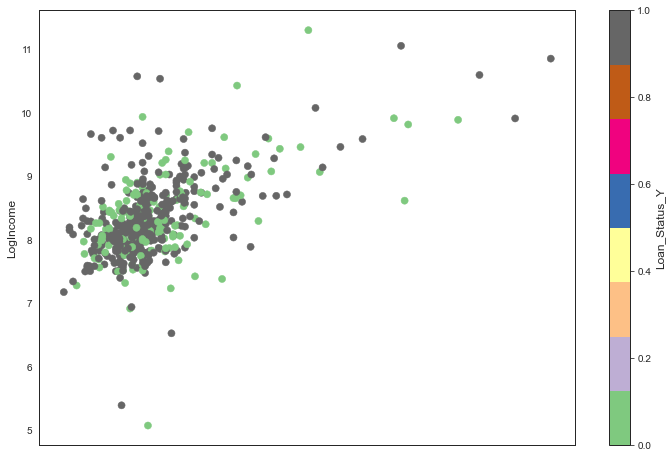

In [33]:
data_train_log.plot(kind='scatter', y='LogIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

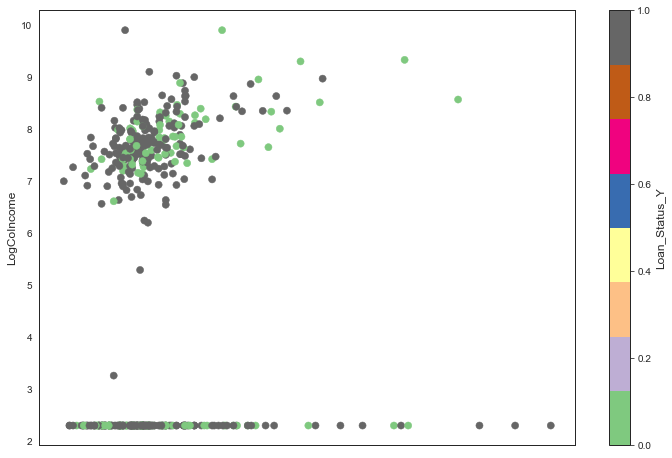

In [34]:
data_train_log.plot(kind='scatter', y='LogCoIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

So, we have a balanced value of the incomes here. 

The CoApplicantIncome is very intersting when = 0 (so on the LogCoIncome = log(10)).
We could add a column with a binary distribution : 
- 0 when LogCoIncome = 1
- 1 when it's > 1 

In [35]:
data_train_log['LogCoIncome'].describe()

count    500.000000
mean       5.273926
std        2.742338
min        2.302585
25%        2.302585
50%        7.034828
75%        7.724557
max        9.903987
Name: LogCoIncome, dtype: float64

In [36]:
data_train_log['CoAppliant']=0*(data_train_log['LogCoIncome']<2.4)
data_train_log['CoAppliant']=1*(data_train_log['LogCoIncome']>2.4)

In [37]:
data_train_log.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome,CoAppliant
0,127.5,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585,0
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149,1
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1,8.009695,2.302585,0
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1,7.860571,7.769801,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1,8.701180,2.302585,0


We will see what is the CoAppliant use in the Categorical features next anlysis !

**Compare the LogCoIcome with the LogIncome**

### Categorical features

Many columns have categorical values. To see what could be all the values for each of those features, we can print the different unique ones.

Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
Property_Area        614 non-null object

In [38]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [39]:
print('Values in Gender :', data_train_log['Gender_Male'].unique())
print('Values in Married :', data_train_log['Married_Yes'].unique())
print('Values in Dependents :', data_train_log['Dependents_1'].unique())
print('Values in Dependents :', data_train_log['Dependents_2'].unique())
print('Values in Dependents :', data_train_log['Dependents_3+'].unique())
print('Values in Education :', data_train_log['Education_Not Graduate'].unique())
print('Values in Self_Employed :', data_train_log['Self_Employed_Yes'].unique())
print('Values in Property_Area :', data_train_log['Property_Area_Semiurban'].unique())
print('Values in Property_Area :', data_train_log['Property_Area_Urban'].unique())

Values in Gender : [1 0]
Values in Married : [0 1]
Values in Dependents : [0 1]
Values in Dependents : [0 1]
Values in Dependents : [0 1]
Values in Education : [0 1]
Values in Self_Employed : [0 1]
Values in Property_Area : [0 1]
Values in Property_Area : [1 0]


We can see how those different features are balanced

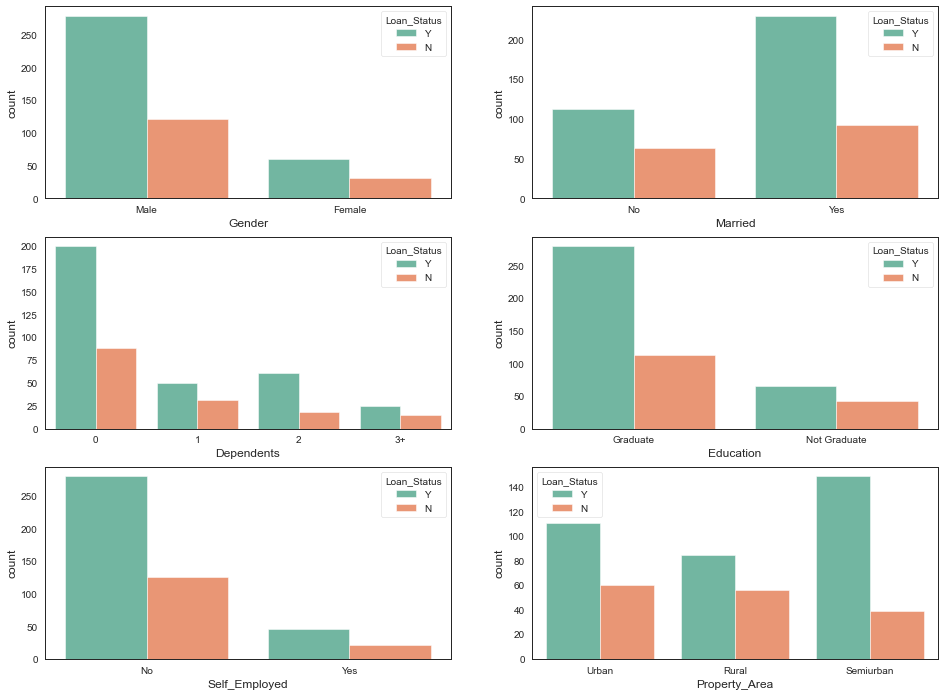

In [40]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))
sns.countplot(x='Gender', data=df, hue='Loan_Status', ax=ax1)
sns.countplot(x='Married', data=df,hue='Loan_Status',  ax=ax2)
sns.countplot(x='Dependents', data=df,hue='Loan_Status',  ax=ax3)
sns.countplot(x='Education', data=df,hue='Loan_Status',  ax=ax4);
sns.countplot(x='Self_Employed', data=df,hue='Loan_Status',  ax=ax5);
sns.countplot(x='Property_Area', data=df,hue='Loan_Status',  ax=ax6);

There is a lot to say here from these simple counts.

- First of all, almost all those features are heavily imbalanced.
- The vast majority of clients are male, married, with a 0 dependecy, gratuated and not self_employed (more than the half of the population actually) were traveling in 3rd class, the other passengers are almost equally split between 2nd and 1st classes.
- The Property_Area is instead almost balanced from the three areas. The Semiurban is the most important one.
- There were almost twice as many men as women travelling on the titanic.
- It seems also that a great number of passengers were traveling alone.

We can see make a summary of the most important client : a man married, undependent, with a graduation, and working in a company.

**Banking categorical Focus**

SOme of the integers column , with a banking focus are not continuous, but categorical : 
- Loan_Amount_Term
- Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

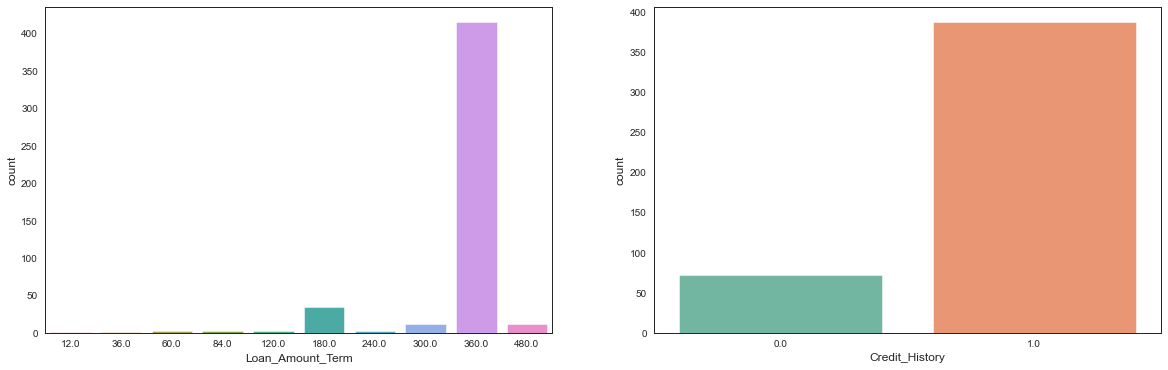

In [41]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Loan_Amount_Term', data=df, ax=ax1)
sns.countplot(x='Credit_History', data=df, ax=ax2)

Here, we can see that credit history is alomost always 1, and loan_amount_term is 360.

**CoAppliant focus**

This column didn't exist. It was created with two values : 
- 0 if the CoAppliant value was 0 (and so our LogCoIncome<2.4)
- 1 if the CoAppliant value was >0 (and so our LogCoIncome>2.4)

So, the summary is if a coappliant exist, this column says : CoAppliant=1

In [42]:
print('The unique values of CoAppliant are : ', data_train_log['CoAppliant'].unique())

The unique values of CoAppliant are :  [0 1]


<AxesSubplot:xlabel='CoAppliant', ylabel='count'>

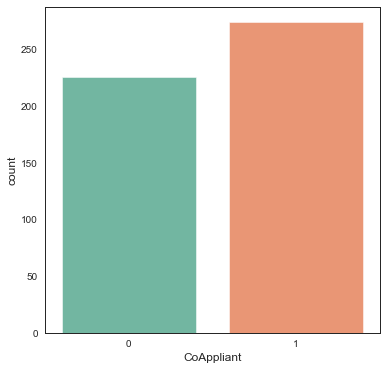

In [43]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1)) = plt.subplots(1, 1, figsize=(6,6))
sns.countplot(x='CoAppliant', data=data_train_log, ax=ax1)

OK, so a lot of clients have a CoAppliant. Let's compare the result on the Loan_Status with or without CoAppliant

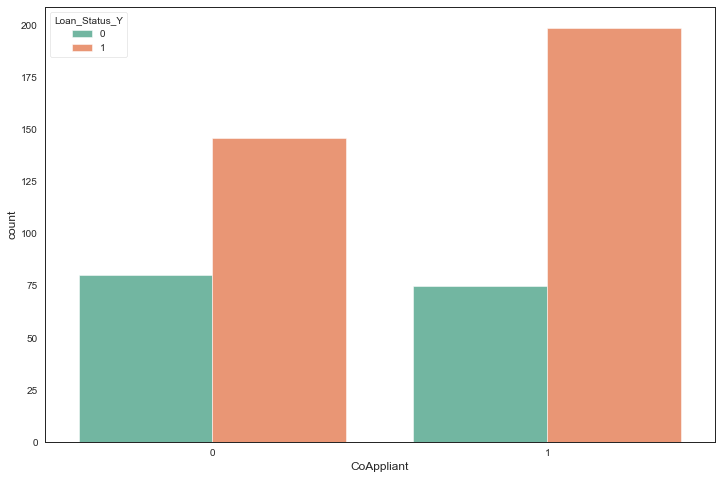

In [44]:
sns.countplot(x="CoAppliant", hue="Loan_Status_Y", data=data_train_log);

The very intersting point is that there is more Yes Loan_Status if there is a CoAppliant !

**Gender Focus**

We see that some column have no gender available

## 4.3. Correlation 

In [45]:
data_train_log.head(2)

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome,CoAppliant
0,127.5,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585,0
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149,1


To have a good correlation, we must avoid the Loan_Id and Loan_Status more usefull is Loan_Status_int link, 

<AxesSubplot:>

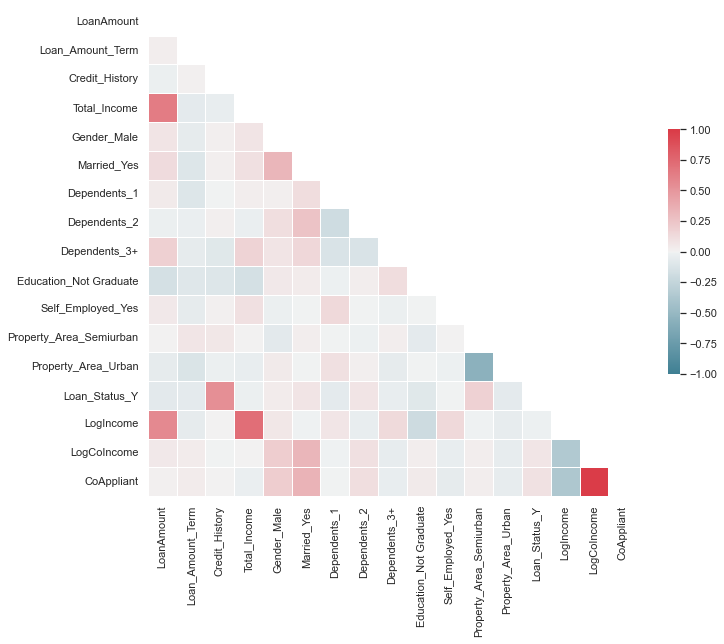

In [46]:
sns.set(style="white")

# The Loan Prediction dataset
d = data_train_log

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Credit_History seems to be the most correlated to the LogIncome

**Credit_History focus**

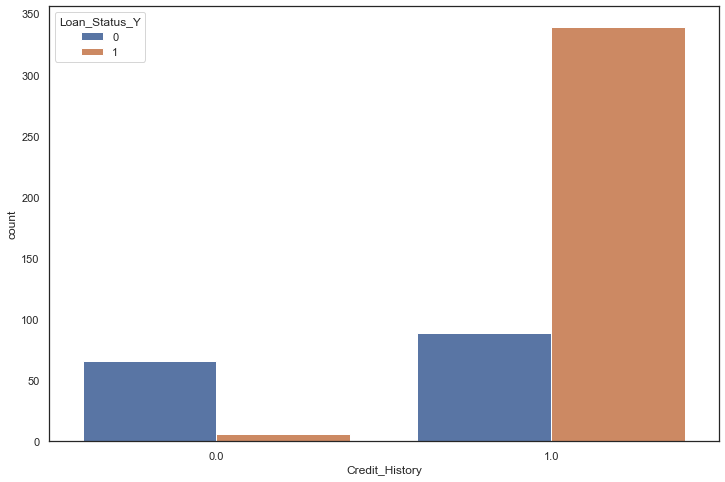

In [47]:
sns.countplot(x="Credit_History", hue="Loan_Status_Y", data=data_train_log);

# 5. Split training and testing

In [48]:
# X definition (called data here)
features = data_train_log.drop(['Loan_Status_Y'], axis=1)
X = features.values

# y definition (called target here)
survived_column = data_train_log['Loan_Status_Y']
y = survived_column.values

In [49]:
from sklearn.model_selection import train_test_split
# replace model_selection by cross_validation for old version of scikit-learn

features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

# 6. Model Analysis

We are now able to use different supervised algoritms. We will start with the Logistci Regression, that is a classifer, and not a regression...

In [50]:
# we can start with a Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1., solver='lbfgs', max_iter=1000)
logreg.fit(features_train, target_train)

LogisticRegression(max_iter=1000)

In [51]:
target_predicted = logreg.predict(features_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_predicted)

0.85

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, features, y, cv=6)
scores

array([0.82142857, 0.77380952, 0.77108434, 0.79518072, 0.84337349,
       0.84337349])

In [54]:
# We can use the accuracy scoring
scores = cross_val_score(logreg, features, y, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("min: {:.4f}, mean: {:.4f}, max: {:.4f}, std: {:.4f}".format(
    scores.min(), scores.mean(), scores.max(), scores.std()))

Logistic Regression CV scores:
min: 0.7400, mean: 0.8020, max: 0.8500, std: 0.0407


Now, we can compare the accuracy scoring of different Machine Learning Algoritms. We will now use a cross-validation of 10.

In [55]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # Generalized Linear Models
    linear_model.LogisticRegressionCV(solver='lbfgs', max_iter=1000),
    linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=None),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(max_iter=5, tol=None),
    linear_model.Perceptron(max_iter=5, tol=None),
    
    # Navies Bayes
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 3),
    
    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

# create the data frame to compare MLA
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy', 'MLA Test Accuracy', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


# index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # set name and parameters
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, features, y, cv  = 10, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = cv_results['test_score'].mean()   

    MLA[row_index] = alg.fit (features, y) #fit model for submission

    row_index+=1

# print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
# print(MLA_compare)
MLA_compare

C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\GuiLu\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1206

,MLA Name,MLA Parameters,MLA Train Accuracy,MLA Test Accuracy,MLA Time
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.809333,0.808,0.004688
11,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.806,0.802,0.002094
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.807778,0.8,0.500764
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999778,0.79,0.18051
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.921111,0.782,0.121774
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.850222,0.778,0.076299
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.986,0.766,0.026132
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.76,0.118036
15,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.708,0.003589
16,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.694,0.001995


Text(0, 0.5, 'Algorithm')

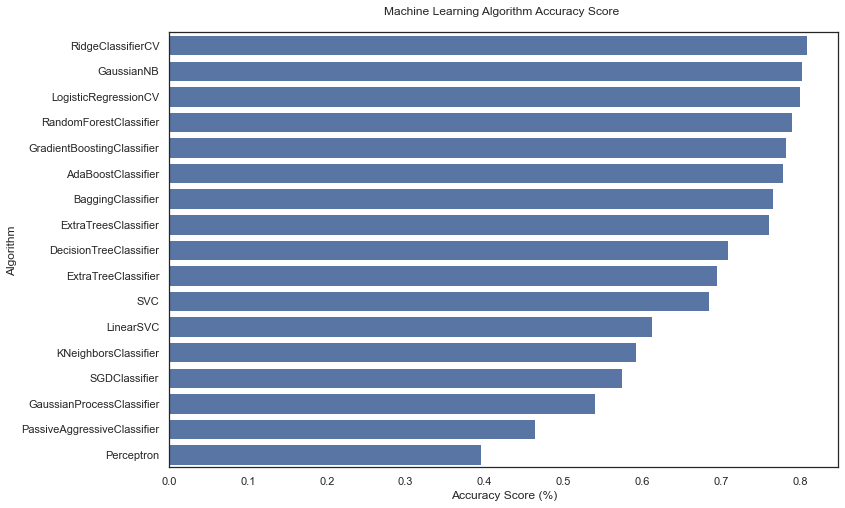

In [56]:
#MLA_compare.describe()
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# 7. Algorithm Optimisation

The Generalized Linear Models don't seem to be very efficient.
Maybe, we could improve a lot the score using a GreadSerchCV to check which best score we can obtain.


In [57]:
%%time

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV



n_estimators_list = [100, 200, 500, 1000]
#max_depth_list = [2, 3, 5]
learning_rate_list = [0.01, 0.02, 0.03, 0.05, 0.1]

# use of the tuned parameters
tuned_parameters = {'n_estimators': n_estimators_list,
                    #'max_depth': max_depth_list,
                    'learning_rate' : learning_rate_list}

# define your clf
clf = AdaBoostClassifier()

# et quand on a des heures pour choisir les meilleurs paramètres...
gs = GridSearchCV(clf, tuned_parameters, cv=5, refit=True, scoring='accuracy', n_jobs=3)
gs.fit(features, y)

CPU times: total: 406 ms
Wall time: 30.7 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [58]:
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [59]:
gs.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [60]:
gs.best_score_

0.8099999999999999

# 8. Test dataset analysis

## 8.1. Load the .csv file

# Read the test data
#test = pd.read_csv('data/test.csv', sep=';')

data_test.head()

data_test.info()

data_test.isna().sum()



# add the same columns to test !
test = pd.concat(
    [data_test.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']),
             pd.get_dummies(data_test.Gender, prefix='Gender', drop_first=True),
             pd.get_dummies(data_test.Married, prefix='Married', drop_first=True),
             pd.get_dummies(data_test.Dependents, prefix='Dependents', drop_first=True),
             pd.get_dummies(data_test.Education, prefix='Education', drop_first=True),
             pd.get_dummies(data_test.Self_Employed, prefix='Self_Employed', drop_first=True),
             pd.get_dummies(data_test.Property_Area, prefix='Property_Area', drop_first=True)],
    axis=1)

# Use the log function for Apllicant and Coapplicant Incomes
test_new = test.assign(LogIncome=lambda x: np.log(x.ApplicantIncome + 10.))
test_new = test_new.assign(LogCoIncome=lambda x: np.log(x.CoapplicantIncome + 10.))

test_new['CoAppliant']=0*(test_new['LogCoIncome']<2.4)
test_new['CoAppliant']=1*(test_new['LogCoIncome']>2.4)

# drop the useless columns
test_new = test_new.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

test_new.isna().sum()

median_features = data_test.get(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
median_features.describe()

median_features = median_features.dropna().median()
median_features

test_new=test_new.fillna(median_features)

test_new.isna().sum()

test_new.head()

## 8.2. Use the fit and predict elements to the file test .csv

Use the best parameters we had : 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=200, random_state=None)

reg = AdaBoostClassifier(learning_rate=0.02, n_estimators=200)

scores = cross_val_score(reg, features, y, cv=4, scoring='accuracy',n_jobs=3)
print("Mean Absolute Error: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

reg.fit(features, y)

test_new.head()

# Treat the test data in the same way as training data. In this case, pull same columns.
X_test = test_new
# Use the model to make predictions
predicted_target = reg.predict(X_test)
# We will look at the predicted TARGET to ensure we have something sensible.
print(predicted_target)

# Convert the predicted target values to a dataframe
my_submission = pd.DataFrame({'Loan_ID': data_test.Loan_ID, 'Loan_Status': predicted_target})

Convert the Loan_Status 1 to Y and 0 to N

my_submission['Loan_Status']=my_submission['Loan_Status'].map({1: "Y", 0 : "N"})

my_submission.head(10)

my_submission.info()

## 8.3. Transform the analysis to a sumbission .csv file

This file can only have two columns : 
- Load_id
- Loan_Status

# you could use any filename. We choose submission here
my_submission.to_csv('data/MySubmission.csv', index=False, header=True, sep=',')

Now, I can see the value of this prediction loan class ! 